--- A1 & A2: Simple Linear Regression (One Attribute) ---

Metrics for TRAIN set (Simple Regression):
MSE: 4.3541
RMSE: 2.0867
MAPE: 67.3529
R2 Score: 0.9002

Metrics for TEST set (Simple Regression):
MSE: 3.3823
RMSE: 1.8391
MAPE: 66.3494
R2 Score: 0.9268
-------------------------------------------------------

--- A3: Multiple Linear Regression (All Attributes) ---

Metrics for TRAIN set (Multiple Regression):
MSE: 1.3341
RMSE: 1.1550
MAPE: 40.1104
R2 Score: 0.9694

Metrics for TEST set (Multiple Regression):
MSE: 0.9739
RMSE: 0.9869
MAPE: 39.5610
R2 Score: 0.9789
-------------------------------------------------------

--- A4 & A5: K-Means Clustering and Evaluation (k=3) ---

Clustering performed with k=3.

Clustering Evaluation Scores:
Silhouette Score: 0.9145
Calinski-Harabasz Score: 31980.6128
Davies-Bouldin Score: 0.4738
-------------------------------------------------------

--- A6: Evaluating Clustering Scores for Different k Values ---


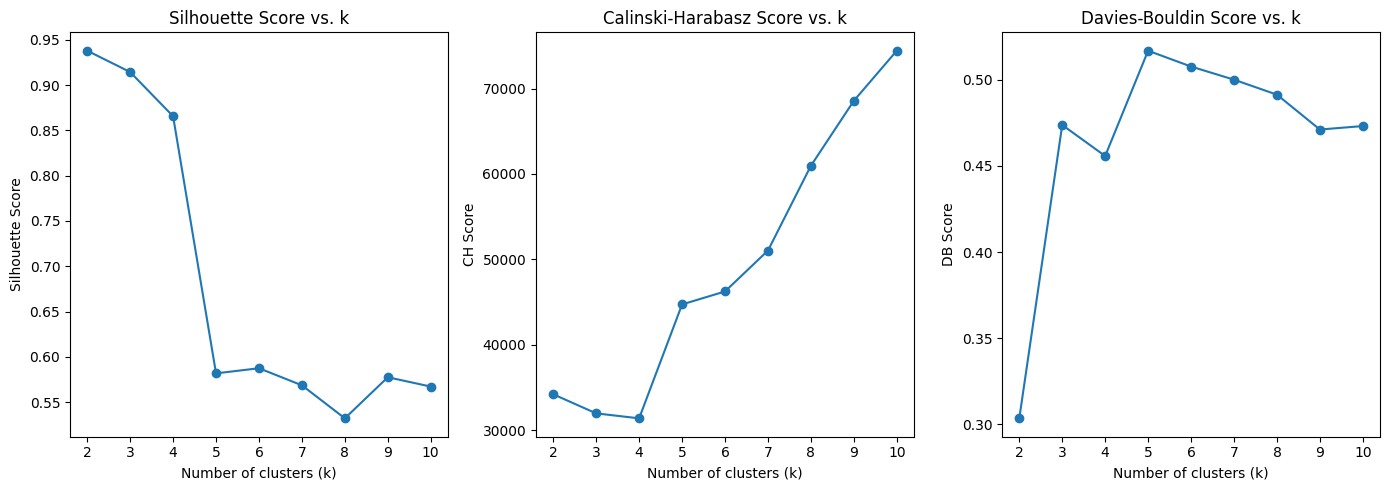


Plots for A6 are displayed.
-------------------------------------------------------

--- A7: Determining Optimal k using the Elbow Method ---


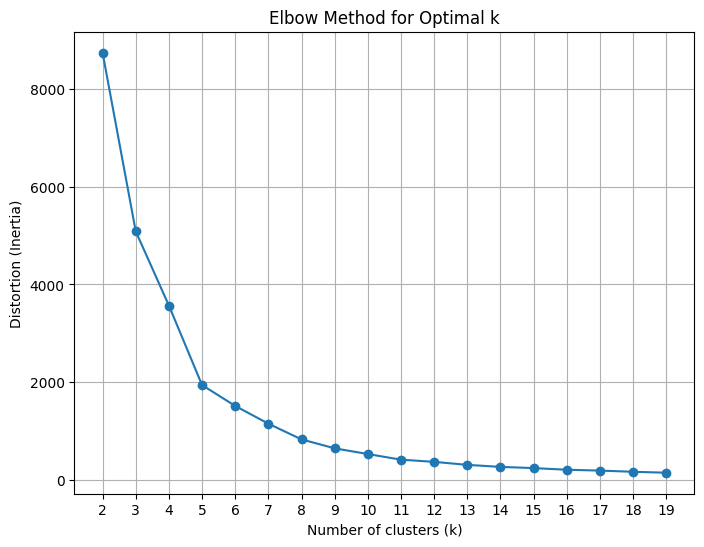


Elbow plot for A7 is displayed.
-------------------------------------------------------


In [10]:
# =================================================================
# 1. IMPORT LIBRARIES
# =================================================================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# =================================================================
# 2. FUNCTION DEFINITIONS
# =================================================================

# --- Data Loader ---
def load_and_prepare_data():
    def extract_values(file_path):
        # Read the file as plain text, each row is one string
        df = pd.read_csv(file_path, header=None)
        # Split by tab and get the 5th field (index 4), convert to float
        return df[0].apply(lambda x: float(x.split("\t")[4]))

    df_res_val = extract_values("reservoir_storage.csv")
    df_gage_val = extract_values("gage_height.csv")
    df_prec_val = extract_values("precipitation.csv")
    df_flow_val = extract_values("stream_flow.csv")

    # Trim all to same length (precipitation might be shorter)
    min_len = min(len(df_res_val), len(df_gage_val), len(df_prec_val), len(df_flow_val))
    df_res_val = df_res_val.iloc[:min_len]
    df_gage_val = df_gage_val.iloc[:min_len]
    df_prec_val = df_prec_val.iloc[:min_len]
    df_flow_val = df_flow_val.iloc[:min_len]

    # Combine into DataFrame
    df = pd.concat([df_res_val, df_gage_val, df_prec_val, df_flow_val], axis=1)
    df.columns = ["Reservoir_Storage", "Gage_Height", "Precipitation", "Stream_Flow"]

    return df

# --- Regression Functions ---
def train_linear_regression(X_train, y_train):
    return LinearRegression().fit(X_train, y_train)

def predict_with_model(model, X):
    return model.predict(X)

def calculate_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, 1, y_true))) * 100
    r2 = r2_score(y_true, y_pred)
    return {
        "MSE": mse,
        "RMSE": rmse,
        "MAPE": mape,
        "R2 Score": r2
    }

# --- Clustering Functions ---
def perform_kmeans_clustering(X, k):
    return KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X)

def calculate_clustering_scores(X, labels):
    return {
        "Silhouette Score": silhouette_score(X, labels),
        "Calinski-Harabasz Score": calinski_harabasz_score(X, labels),
        "Davies-Bouldin Score": davies_bouldin_score(X, labels)
    }

# =================================================================
# 3. MAIN PROGRAM EXECUTION
# =================================================================

# Load your actual dataset
df = load_and_prepare_data()
X = df.drop(columns=["Stream_Flow"])
y = df["Stream_Flow"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- A1 & A2: Simple Linear Regression (One Attribute) ---
print("--- A1 & A2: Simple Linear Regression (One Attribute) ---")
X_train_simple = X_train[["Reservoir_Storage"]]
X_test_simple = X_test[["Reservoir_Storage"]]
simple_reg_model = train_linear_regression(X_train_simple, y_train)
y_train_pred_simple = predict_with_model(simple_reg_model, X_train_simple)
y_test_pred_simple = predict_with_model(simple_reg_model, X_test_simple)
train_metrics_simple = calculate_regression_metrics(y_train, y_train_pred_simple)
test_metrics_simple = calculate_regression_metrics(y_test, y_test_pred_simple)

print("\nMetrics for TRAIN set (Simple Regression):")
for metric, value in train_metrics_simple.items():
    print(f"{metric}: {value:.4f}")
print("\nMetrics for TEST set (Simple Regression):")
for metric, value in test_metrics_simple.items():
    print(f"{metric}: {value:.4f}")
print("-" * 55)

# --- A3: Multiple Linear Regression (All Attributes) ---
print("\n--- A3: Multiple Linear Regression (All Attributes) ---")
multi_reg_model = train_linear_regression(X_train, y_train)
y_train_pred_multi = predict_with_model(multi_reg_model, X_train)
y_test_pred_multi = predict_with_model(multi_reg_model, X_test)
train_metrics_multi = calculate_regression_metrics(y_train, y_train_pred_multi)
test_metrics_multi = calculate_regression_metrics(y_test, y_test_pred_multi)

print("\nMetrics for TRAIN set (Multiple Regression):")
for metric, value in train_metrics_multi.items():
    print(f"{metric}: {value:.4f}")
print("\nMetrics for TEST set (Multiple Regression):")
for metric, value in test_metrics_multi.items():
    print(f"{metric}: {value:.4f}")
print("-" * 55)

# --- A4 & A5: K-Means Clustering and Evaluation ---
print("\n--- A4 & A5: K-Means Clustering and Evaluation (k=3) ---")
k_example = 3
kmeans_model_example = perform_kmeans_clustering(X_train, k=k_example)
labels_example = kmeans_model_example.labels_
centers_example = kmeans_model_example.cluster_centers_
print(f"\nClustering performed with k={k_example}.")
clustering_scores = calculate_clustering_scores(X_train, labels_example)
print("\nClustering Evaluation Scores:")
for score_name, value in clustering_scores.items():
    print(f"{score_name}: {value:.4f}")
print("-" * 55)

# --- A6: Find Optimal k using Evaluation Scores ---
print("\n--- A6: Evaluating Clustering Scores for Different k Values ---")
k_values = range(2, 11)
silhouette_scores = []
ch_scores = []
db_scores = []

for k in k_values:
    kmeans_model = perform_kmeans_clustering(X_train, k=k)
    labels = kmeans_model.labels_
    scores = calculate_clustering_scores(X_train, labels)
    silhouette_scores.append(scores["Silhouette Score"])
    ch_scores.append(scores["Calinski-Harabasz Score"])
    db_scores.append(scores["Davies-Bouldin Score"])

plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o')
plt.title('Calinski-Harabasz Score vs. k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('CH Score')

plt.subplot(1, 3, 3)
plt.plot(k_values, db_scores, marker='o')
plt.title('Davies-Bouldin Score vs. k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('DB Score')

plt.tight_layout()
plt.show()
print("\nPlots for A6 are displayed.")
print("-" * 55)

# --- A7: Find Optimal k using Elbow Plot ---
print("\n--- A7: Determining Optimal k using the Elbow Method ---")
distortions = []
k_range_elbow = range(2, 20)
for k in k_range_elbow:
    kmeans_model = perform_kmeans_clustering(X_train, k)
    distortions.append(kmeans_model.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range_elbow, distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.xticks(k_range_elbow)
plt.grid(True)
plt.show()
print("\nElbow plot for A7 is displayed.")
print("-" * 55)
